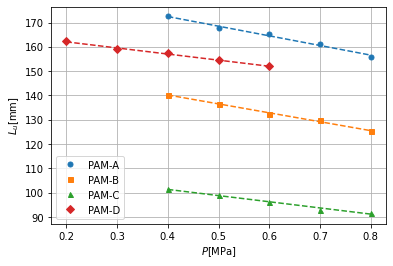

{'PAM-A': {'slope': -39.70000000000028, 'intercept': 188.33400000000015},
 'PAM-B': {'slope': -36.70000000000011, 'intercept': 154.86000000000007},
 'PAM-C': {'slope': -25.4000000000001, 'intercept': 111.48000000000003},
 'PAM-D': {'slope': -25.1000000000001, 'intercept': 167.06000000000003}}

In [26]:

# Rechecking the dataframe for available data
df

# Re-plotting the graph with the correct pressure ranges and ensuring that the legend and regression lines are correct.
fig, ax = plt.subplots()

# Set markers and colors for each PAM
markers = ['o', 's', '^', 'D']  # Markers for each PAM
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get colors from the color cycle

# Loop through each PAM to plot
for i, (col, (min_pressure, max_pressure)) in enumerate(pressure_ranges.items()):
    # Filter data for regression within the specified pressure range
    df_for_regression = df[(df.index >= min_pressure) & (df.index <= max_pressure)][col].dropna()
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.plot(x, y, label=col, marker=markers[i], linestyle='None', markersize=5, color=colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure, max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=colors[i])

# Set labels and title
ax.set_xlabel('$P$[MPa]')
ax.set_ylabel('$L_u$[mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定
plt.show()

# Re-calculating the intercept and slope for each PAM's regression line
regression_results = {}

# Plotting is not necessary for this calculation, so we will skip that part
for col in df.columns:
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    df_for_regression = df[(df.index >= min_pressure) & (df.index <= max_pressure)][col].dropna()
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0 and len(y) > 0:
        model = np.polyfit(x, y, 1)
        # Coefficients (slope and intercept) are in the model array
        slope, intercept = model
        regression_results[col] = {'slope': slope, 'intercept': intercept}

regression_results


